In [13]:
import os
import numpy as np
from numpy import save
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout, LeakyReLU
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#load folder datasets
folder = "/content/drive/MyDrive/AI in Business/AI Project/Project 3/Money/Tiền Việt Nam"
#tiền xử lý dữ liệu
photos,labels = list(), list()
for file in os.listdir(folder):
  output = 0
  if file.startswith('one'):
    output = 0
  elif file.startswith('twen'):
    output = 1
  elif file.startswith('fifty'):
    output = 2
  elif file.startswith('ohun'):
    output = 3
  elif file.startswith('thun'):
    output = 4
  elif file.startswith('fhun'):
    output = 5
  if output is not None:
    img = load_img(os.path.join(folder,file), target_size=(200,200,3))
    img = img_to_array(img)
    photos.append(img)
    labels.append(output)
#Xác định kiểu cho mảng
photos = np.array(photos)
labels = np.array(labels)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(photos,labels,test_size=0.2, random_state=42)
x1=x_train
x2=x_test
y1=y_train
y2=y_test

In [15]:
x_train=x_train.reshape(248,200,200,3)
x_train = x_train.astype('float32') / 255

x_test=x_test.reshape(62,200,200,3)
x_test = x_test.astype('float32') / 255

In [16]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,6)
y_test = to_categorical(y_test,6) 

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(200,200,3), padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='linear', padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128, kernel_size=(3,3), activation='linear', padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
#model.add(Dropout(:0.25))
# 3 lần tích chập

model.add(Flatten())
#Trải bằng lệnh flatten

model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 128)     

In [19]:
from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train, epochs=50, batch_size=128, verbose=1)

Epoch 1/50
2/2 [==============================] - 3s 182ms/step - loss: 4.7534 - accuracy: 0.1290
Epoch 2/50
2/2 [==============================] - 0s 149ms/step - loss: 10.9911 - accuracy: 0.2177
Epoch 3/50
2/2 [==============================] - 0s 151ms/step - loss: 5.1671 - accuracy: 0.1855
Epoch 4/50
2/2 [==============================] - 0s 148ms/step - loss: 4.5016 - accuracy: 0.2661
Epoch 5/50
2/2 [==============================] - 0s 148ms/step - loss: 3.2739 - accuracy: 0.1694
Epoch 6/50
2/2 [==============================] - 0s 149ms/step - loss: 2.2516 - accuracy: 0.1976
Epoch 7/50
2/2 [==============================] - 0s 148ms/step - loss: 1.9387 - accuracy: 0.2137
Epoch 8/50
2/2 [==============================] - 0s 155ms/step - loss: 1.8153 - accuracy: 0.2540
Epoch 9/50
2/2 [==============================] - 0s 150ms/step - loss: 1.7222 - accuracy: 0.2782
Epoch 10/50
2/2 [==============================] - 0s 162ms/step - loss: 1.5753 - accuracy: 0.3710
Epoch 11/50
2/2 [=

In [21]:
model_loss1, model_acc1 = model.evaluate(x_train, y_train)
print('Training loss rate: ', model_loss1)
print('Training accuracy rate: ', model_acc1)

8/8 [==============================] - 1s 21ms/step - loss: 0.0365 - accuracy: 1.0000
Training loss rate:  0.03653915598988533
Training accuracy rate:  1.0


TEST WITH TEST DATA

In [22]:
model_loss, model_acc = model.evaluate(x_test, y_test)
print('Loss rate: ', model_loss)
print('Testing accuracy rate: ', model_acc)

2/2 [==============================] - 0s 26ms/step - loss: 1.1891 - accuracy: 0.7742
Loss rate:  1.189083456993103
Testing accuracy rate:  0.774193525314331


1/1 [==============================] - 0s 76ms/step
Expectation [2]
Answer 5
1/1 [==============================] - 0s 20ms/step
Expectation [1]
Answer 5
1/1 [==============================] - 0s 18ms/step
Expectation [0]
Answer 0
1/1 [==============================] - 0s 21ms/step
Expectation [1]
Answer 1
1/1 [==============================] - 0s 18ms/step
Expectation [3]
Answer 3
1/1 [==============================] - 0s 21ms/step
Expectation [1]
Answer 1
1/1 [==============================] - 0s 18ms/step
Expectation [0]
Answer 0
1/1 [==============================] - 0s 24ms/step
Expectation [2]
Answer 2
1/1 [==============================] - 0s 20ms/step
Expectation [4]
Answer 4
1/1 [==============================] - 0s 30ms/step
Expectation [0]
Answer 0


<function matplotlib.pyplot.show(close=None, block=None)>

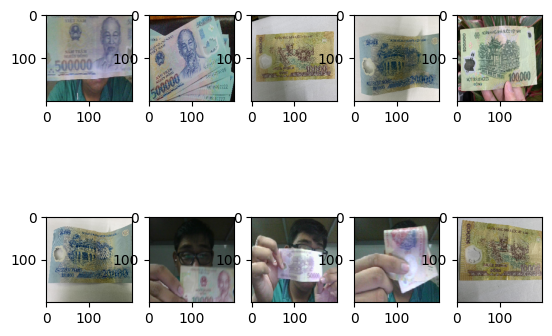

In [23]:
for i in range(0,10):
  img1=x2[i]
  plt.subplot(2,5,i+1) 
  plt.imshow(x_test[i])
  img1=np.array(img1)
  img1 = img1.reshape(1, 200, 200, 3)
  img1=img1/255
  print('Expectation', np.argmax(model.predict(img1),axis=-1))
  print('Answer', y2[i])
plt.show

PREDICT

1/1 [==============================] - 0s 22ms/step


array([0])

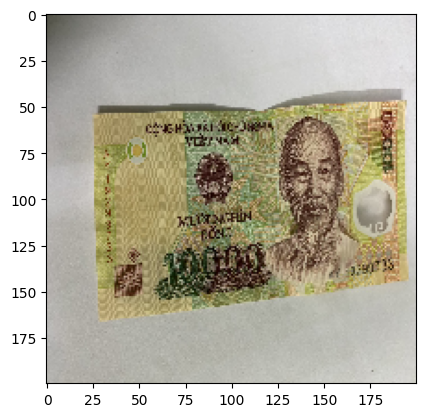

In [24]:
import numpy as np
from keras.utils import load_img, img_to_array
#Tải ảnh
filename = "/content/drive/MyDrive/AI in Business/AI Project/Project 3/Money/10k.jpg"
img = load_img(filename,target_size=(200,200))
plt.imshow(img)
#chuyển ảnh thành mảng
img = img_to_array(img)
#Định dạng thành mẫu dữ liệu với 3 kênh
img = img.reshape(1,200,200,3)
# Chuẩn bị dữ liệu dạng pixel
img = img.astype('float32')
img = img/255.0
np.argmax(model.predict(img),axis=1)
